# Logistic regression
## Classification with logistic regression and the sigmoid function: a tractable step function

$$\sigma (z) = \frac{1}{1+e^{-z}}$$

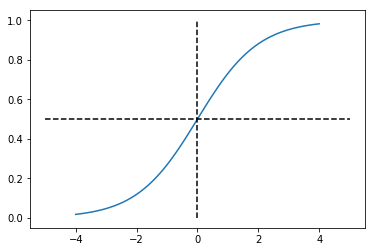

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-4,4,100)
plt.figure()
plt.plot(z, 1/(1+np.exp(-1*z)))
plt.plot([-5,5],[0.5,0.5],'k--')
plt.plot([0,0],[0,1],'k--')
plt.show()

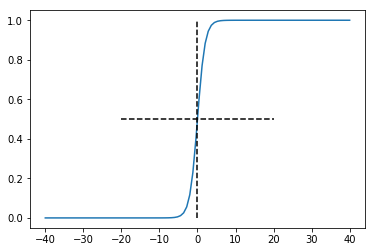

In [22]:
z = np.linspace(-40,40,100)
plt.figure()
plt.plot(z, 1/(1+np.exp(-1*z)))
plt.plot([-20,20],[0.5,0.5],'k--')
plt.plot([0,0],[0,1],'k--')
plt.show()

## Using optimization to find the best regression coefficients
- The input to the sigmoid function described will be z, where z is given by the following:
$$z = w_0x_0 + w_1x_1 + w_2x_2+...+w_nx_n$$

In vector notation we can write this as $z = w^Tx$
- $x$ is the input features
- $w$ is the best coefficients

### Gradient ascent 
- To find the maximum point

$$\nabla f(x,y) = \left(\begin{array}{c}
\frac{\partial f(x,y)}{\partial x} \\ 
\frac{\partial f(x,y)}{\partial y} \\
\end{array}\right) $$

$$w:=w+\alpha \nabla f(w)$$

![Gradient ascent](./src/GradientAscent.png)

### Train: using gradient ascent to find the best parameters 

In [89]:
import numpy as np

def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('./src/testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

In [90]:
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

In [91]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose()
    m,n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n,1)) # 每一项权重初始化为1
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose()*error
    return weights

In [92]:
dataArr,labelMat=loadDataSet()
weights = gradAscent(dataArr,labelMat)

In [93]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s',label='class0')
    ax.scatter(xcord2, ycord2, s=30, c='green',label='class1')
    x = np.arange(-5.0, 5.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]           
    ax.plot(x, y)
    plt.legend()
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show() 

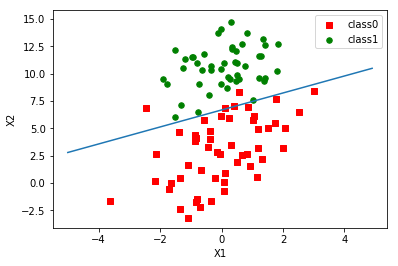

In [94]:
plotBestFit(weights.getA())

### Train: stochastic gradient ascent

In [95]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(np.sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

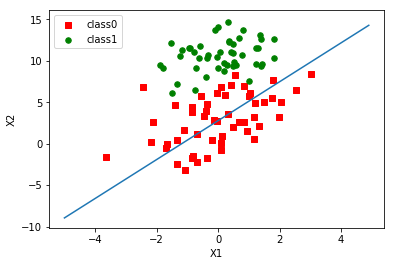

In [96]:
dataArr,labelMat=loadDataSet()
weights = stocGradAscent0(np.array(dataArr),labelMat)
plotBestFit(weights)

In [106]:
def stocGradAscent1(dataMatrix, classLabels, numIter = 150):
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(np.random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

In [ ]:
dataArr,labelMat=loadDataSet()
weights = stocGradAscent1(np.array(dataArr),labelMat)
plotBestFit(weights)

Odds

$odds = \frac{p}{1-p}$

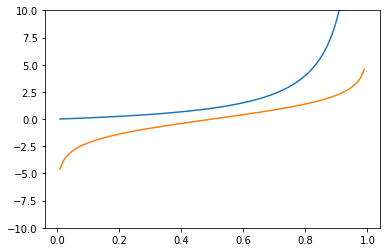

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the range of propability from 0 to 1
p = np.arange(0.01,1,0.01)
odds = p/(1-p)
logitP = np.log(odds)
plt.figure()
plt.plot(p,odds)
plt.plot(p,logitP)
plt.ylim(-10,10)
plt.show()

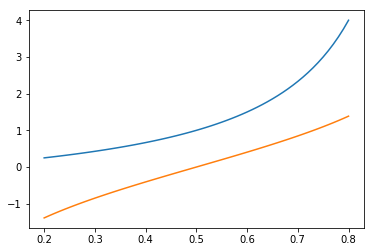